In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []


image_files = [f for f in glob.glob(r'C:\Users\Nandeesh\projects\Gender reco\images' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)



In [2]:

for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] 
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) 



In [3]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")



In [4]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
        chanDim = 1
    
    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model



In [10]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)



C:\Users\Nandeesh\AppData\Local\Temp\ipykernel_18960\4103988510.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100
28/28 [==============================] - 58s 2s/step - loss: 0.7760 - accuracy: 0.7316 - val_loss: 0.7044 - val_accuracy: 0.5173
Epoch 2/100
28/28 [==============================] - 49s 2s/step - loss: 0.4752 - accuracy: 0.8164 - val_loss: 0.8062 - val_accuracy: 0.5173
Epoch 3/100
28/28 [==============================] - 48s 2s/step - loss: 0.4019 - accuracy: 0.8439 - val_loss: 1.4975 - val_accuracy: 0.5173
Epoch 4/100
28/28 [==============================] - 48s 2s/step - loss: 0.3512 - accuracy: 0.8720 - val_loss: 1.0043 - val_accuracy: 0.5173
Epoch 5/100
28/28 [==============================] - 46s 2s/step - loss: 0.3337 - accuracy: 0.8658 - val_loss: 0.8032 - val_accuracy: 0.5173
Epoch 6/100
28/28 [==============================] - 49s 2s/step - loss: 0.3233 - accuracy: 0.8714 - val_loss: 0.5585 - val_accuracy: 0.7359
Epoch 7/100
28/28 [==============================] - 50s 2s/step - loss: 0.2986 - accuracy: 0.8883 - val_loss: 0.7851 - val_accuracy: 0.6104
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 34s 1s/step - loss: 0.0568 - accuracy: 0.9792 - val_loss: 0.0991 - val_accuracy: 0.9654
Epoch 60/100
28/28 [==============================] - 32s 1s/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.2302 - val_accuracy: 0.9459
Epoch 61/100
28/28 [==============================] - 34s 1s/step - loss: 0.0474 - accuracy: 0.9832 - val_loss: 0.3482 - val_accuracy: 0.9307
Epoch 62/100
28/28 [==============================] - 33s 1s/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.1199 - val_accuracy: 0.9632
Epoch 63/100
28/28 [==============================] - 33s 1s/step - loss: 0.0461 - accuracy: 0.9832 - val_loss: 0.6721 - val_accuracy: 0.8593
Epoch 64/100
28/28 [==============================] - 33s 1s/step - loss: 0.0481 - accuracy: 0.9826 - val_loss: 0.1462 - val_accuracy: 0.9654
Epoch 65/100
28/28 [==============================] - 34s 1s/step - loss: 0.0971 - accuracy: 0.9663 - val_loss: 0.4084 - val_accuracy: 0.8961
Epoch 

In [13]:
import pandas as pd
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

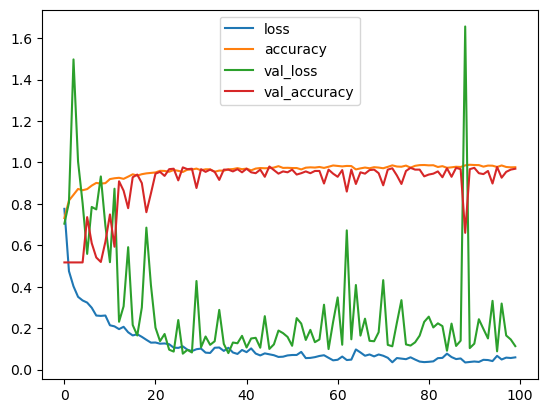

In [14]:
loss.plot()

In [15]:
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


INFO:tensorflow:Assets written to: gender_detection.model\assets


In [16]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
                    


In [17]:
# load model
model = load_model('gender_detection.model')

# open webcam
webcam = cv2.VideoCapture(0)
    
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    # display output
    cv2.imshow("gender detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - ETA: 0s

KeyboardInterrupt: 

In [18]:
# load model
model = load_model('gender_detection.model')

# open webcam
webcam = cv2.VideoCapture('sample video.mp4')
    
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    # display output
    cv2.imshow("gender detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


TypeError: cannot unpack non-iterable NoneType object